In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker
from sqlalchemy import distinct

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [7]:
# reflect an existing database into a new model
# reflect the tables

Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Total dates in Measurement
# session.query(func.count(Measurement.date)).all()

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Last year of database", year_ago)

Last year of database 2016-08-23


In [177]:
# Perform a query to retrieve the data and precipitation scores
# Select only date and prcp values
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").first()
results

('2016-08-23', 0.0)

In [126]:
# Save the query results as a Pandas DataFrame and set the index to the date column
m_df = pd.DataFrame(results, columns=['date', 'prcp'])
m_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [15]:
# Sort the dataframe by date
m_df.sort_values(by='date').fillna(0)

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


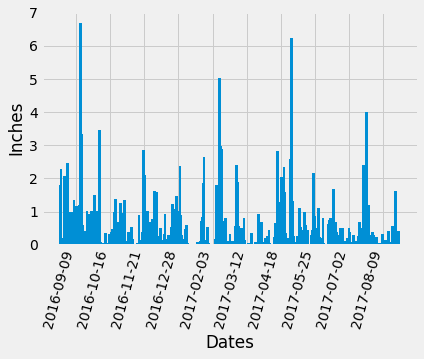

In [169]:
# Use Pandas Plotting with Matplotlib to plot the data
# m_df.plot(kind='bar')
plt.bar(m_df.date, m_df.prcp, width=3)
# plt.tight_layout()
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.xticks(rotation=75, ha="right")
loc = matplotlib.ticker.LinearLocator(numticks = 12) 
plt.gca().xaxis.set_major_locator(loc) 
plt.show()

In [20]:
#Summary statistics in one statement
m_df["prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data

prcp_mean = round(m_df["prcp"].mean(),2)
prcp_med = round(m_df["prcp"].median(),2)
prcp_var = round(m_df["prcp"].var(),2)
prcp_stddev = round(m_df["prcp"].std(),2)
prcp_sem = round(m_df["prcp"].sem(),2)
print(f'The mean of the preciptiation data is {prcp_mean}')
print(f'The median of the preciptiation data is {prcp_med}')
print(f'The variance of the preciptiation data is {prcp_var}')
print(f'The standard deviation of the preciptiation data is {prcp_stddev}')
print(f'The SEM of the preciptiation data is {prcp_sem}')

The mean of the preciptiation data is 0.18
The median of the preciptiation data is 0.02
The variance of the preciptiation data is 0.21
The standard deviation of the preciptiation data is 0.46
The SEM of the preciptiation data is 0.01


In [ ]:
## STATION ANALYSIS

In [65]:
# Design a query to show how many stations are available in this dataset?
[column for column in engine.execute ('PRAGMA table_info(station)')]

[(0, 'id', 'INTEGER', 1, None, 1),
 (1, 'station', 'TEXT', 0, None, 0),
 (2, 'name', 'TEXT', 0, None, 0),
 (3, 'latitude', 'FLOAT', 0, None, 0),
 (4, 'longitude', 'FLOAT', 0, None, 0),
 (5, 'elevation', 'FLOAT', 0, None, 0)]

In [64]:
[column for column in engine.execute ('PRAGMA table_info(measurement)')]

[(0, 'id', 'INTEGER', 1, None, 1),
 (1, 'station', 'TEXT', 0, None, 0),
 (2, 'date', 'TEXT', 0, None, 0),
 (3, 'prcp', 'FLOAT', 0, None, 0),
 (4, 'tobs', 'FLOAT', 0, None, 0)]

In [50]:
num_stations = session.query(Station.station).count()
num_stations

9

In [156]:
#Unique stations
s_id = session.query(Measurement.station).distinct().all()
s_id

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [158]:
# Separate count of each unique station
station_count = session.query(func.count(Measurement.station)).group_by(Measurement.station).all()
station_count

[(1979), (2709), (2202), (2612), (1372), (511), (2772), (2724), (2669)]

In [171]:
#Putting unique and count in one query result
test = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
test

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [231]:
#Put all stations and temps into a dataframe to work with

prcp_results = session.query(Measurement.station, Measurement.tobs).all()

t_df = pd.DataFrame(prcp_results, columns=['station', 'tobs'])
t_df

,station,tobs
0,USC00519397,65.0
1,USC00519397,63.0
2,USC00519397,74.0
3,USC00519397,76.0
4,USC00519397,73.0
...,...,...
19545,USC00516128,71.0
19546,USC00516128,78.0
19547,USC00516128,76.0
19548,USC00516128,76.0


In [232]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order

grouped_df = t_df[['station', 'tobs']].groupby('station').count()
tobs_group = pd.DataFrame(grouped_df)
tobs_group.sort_values('tobs', ascending=False)

,tobs
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [260]:
# Choose the station with the highest number of temperature observations. Query results show Station == USC00519281


temp_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= "2016-08-23")

temp_df = pd.DataFrame(temp_results, columns=['station', 'tobs'])
temp_df

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


In [261]:
# # Using the station id from the previous query, calculate the lowest temperature recorded 
# highest temperature recorded, and average temperature of the MOST ACTIVE STATION?

max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= "2016-08-23").scalar()
min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= "2016-08-23").scalar()
avg = round(session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= "2016-08-23").scalar(),2)
print(f'The Max temp recorded at Station USC00519281 was {max}.')
print(f'The Min temp recorded at Station USC00519281 was {min}.')
print(f'The Average temp recorded at Station USC00519281 was {avg}.')

The Max temp recorded at Station USC00519281 was 83.0.
The Min temp recorded at Station USC00519281 was 59.0.
The Average temp recorded at Station USC00519281 was 73.11.


In [263]:
#Convert temp type to a float instead of string that won't work for histogram

temp_df = temp_df['tobs'].astype(float)

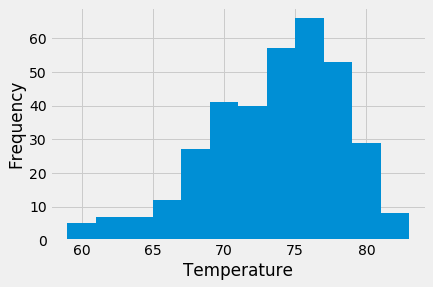

In [266]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = temp_df.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
